In [4]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import augly.image as imaugs
from PIL import Image
from tqdm import tqdm
from augly.image.composition import Compose

In [ ]:
cat_dir = "cats"
dog_dir = "dogs"
combined_dir = "original_dataset"

if not os.path.exists(combined_dir):
    os.makedirs(combined_dir)

data = []
labels = []

for img in os.listdir(cat_dir):
    data.append(os.path.join(cat_dir, img))
    labels.append(0)  # 0 for cat

for img in os.listdir(dog_dir):
    data.append(os.path.join(dog_dir, img))
    labels.append(1)  # 1 for dog

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

def copy_images(file_list, label_list, target_folder):
    for file, label in zip(file_list, label_list):
        label_folder = os.path.join(target_folder, str(label))  
        os.makedirs(label_folder, exist_ok=True)
        shutil.copy(file, label_folder)

train_folder = os.path.join(combined_dir, "train")
test_folder = os.path.join(combined_dir, "test")

copy_images(train_data, train_labels, train_folder)
copy_images(test_data, test_labels, test_folder)

print("Dataset successfully prepared with train-test split!")

In [5]:
cat_dir = "cats"
dog_dir = "dogs"
combined_dir = "dataset"

if not os.path.exists(combined_dir):
    os.makedirs(combined_dir)

data = []
labels = []

for img in os.listdir(cat_dir):
    data.append(os.path.join(cat_dir, img))
    labels.append(0)  # 0 for cat

for img in os.listdir(dog_dir):
    data.append(os.path.join(dog_dir, img))
    labels.append(1)  # 1 for dog

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

def copy_images(file_list, label_list, target_folder):
    for file, label in zip(file_list, label_list):
        label_folder = os.path.join(target_folder, str(label))  
        os.makedirs(label_folder, exist_ok=True)
        shutil.copy(file, label_folder)

train_folder = os.path.join(combined_dir, "train")
test_folder = os.path.join(combined_dir, "test")

copy_images(train_data, train_labels, train_folder)
copy_images(test_data, test_labels, test_folder)

print("Dataset successfully prepared with train-test split!")

Dataset successfully prepared with train-test split!


In [8]:
import numpy as np
np.float = float
import os
import random
from PIL import Image
import augly.image.functional as imf

# Define paths
train_dir = "dataset/train"
labels = ["0", "1"]

# Create function for applying 3 random augmentations
def apply_random_augmentations(img):
    """Applies 3 random augmentations (with different transformations) to an image."""
    augmentations = [
        lambda img: imf.crop(img, 
                             x1=random.uniform(0, 0.2),
                             y1=random.uniform(0, 0.2),
                             x2=random.uniform(0.8, 1.0),
                             y2=random.uniform(0.8, 1.0)),
        
        lambda img: imf.color_jitter(img,
                                     brightness_factor=random.uniform(0.8, 1.2),
                                     contrast_factor=random.uniform(0.8, 1.2),
                                     saturation_factor=random.uniform(0.8, 1.2)),
        
        lambda img: imf.grayscale(img),
        
        lambda img: imf.opacity(img, level=random.uniform(0.7, 1.0)),
        
        lambda img: imf.blur(img, radius=random.uniform(1, 3)),
        
        lambda img: imf.rotate(img, degrees=random.uniform(-30, 30)),
        
        lambda img: imf.perspective_transform(img, sigma=random.uniform(20, 40)),
        
        lambda img: imf.brightness(img, factor=random.uniform(0.8, 1.2)),
        
        lambda img: imf.hflip(img),  # Horizontal Flip
        
        lambda img: imf.vflip(img)   # Vertical Flip
    ]
    
    # Select 3 random augmentations (ensuring they are different)
    selected_augs = random.sample(augmentations, 3)
    
    # Apply augmentations sequentially
    for aug in selected_augs:
        img = aug(img)
    
    return img

# Perform augmentation on all training images
for label in labels:
    img_folder = os.path.join(train_dir, label)
    augmented_count = 0
    
    for img_name in os.listdir(img_folder):
        img_path = os.path.join(img_folder, img_name)
        
        try:
            img = Image.open(img_path).convert("RGB")
            
            # Generate 2 augmented versions per image
            for i in range(2):
                aug_img = apply_random_augmentations(img)
                aug_img_name = f"aug_{augmented_count}_{i}.jpg"
                aug_img_path = os.path.join(img_folder, aug_img_name)
                
                aug_img.save(aug_img_path)
                augmented_count += 1

        except Exception as e:
            print(f"Error processing {img_name}: {e}")

print("Data augmentation completed successfully!")


Data augmentation completed successfully!


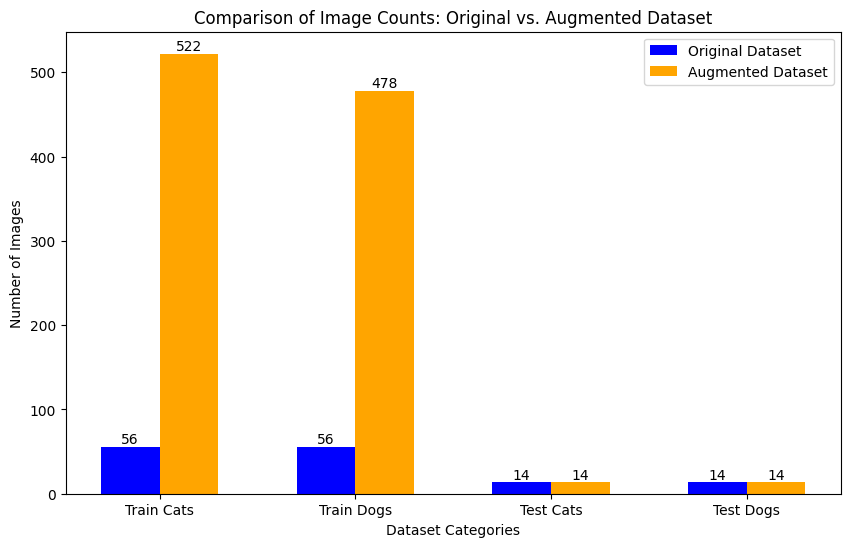

In [22]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Function to count images in each category (0 - cats, 1 - dogs)
def count_images(directory):
    counts = {}
    for label in ["0", "1"]:  # Folders: '0' for cats, '1' for dogs
        label_dir = os.path.join(directory, label)
        if os.path.exists(label_dir):
            counts[label] = len(os.listdir(label_dir))
        else:
            counts[label] = 0  # If the directory is missing, assume 0 images
    return counts

# Paths to original and augmented datasets
original_train_dir = "original_dataset/train"
original_test_dir = "original_dataset/test"
augmented_train_dir = "dataset/train"
augmented_test_dir = "dataset/test"

# Get image counts
original_train_counts = count_images(original_train_dir)
original_test_counts = count_images(original_test_dir)
augmented_train_counts = count_images(augmented_train_dir)
augmented_test_counts = count_images(augmented_test_dir)

# Prepare data for plotting
labels = ["Train Cats", "Train Dogs", "Test Cats", "Test Dogs"]
original_counts = [
    original_train_counts["0"], original_train_counts["1"],
    original_test_counts["0"], original_test_counts["1"]
]
augmented_counts = [
    augmented_train_counts["0"], augmented_train_counts["1"],
    augmented_test_counts["0"], augmented_test_counts["1"]
]

x = np.arange(len(labels))  # Label locations
width = 0.3  # Bar width

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, original_counts, width, label="Original Dataset", color="blue")
bars2 = ax.bar(x + width/2, augmented_counts, width, label="Augmented Dataset", color="orange")

# Labels and title
ax.set_xlabel("Dataset Categories")
ax.set_ylabel("Number of Images")
ax.set_title("Comparison of Image Counts: Original vs. Augmented Dataset")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show count labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10)

plt.show()
